# Function to generate kaplan meyer curve and logrank test results

In [1]:
# The function
generate = function(data)
{
# 1- Data transformation    
# Remove the unusual column (Replicat)
data = data[,-1]
# Get the names of var
names=c()
for(i in 1:ncol(data)){names[i] = colnames(data[i])}
# Get the number of groups
ngroup = length(names)-1
# Get the number of days of the experiment
ntime = nrow(data)
# Get the vector of occurences
occurence=c()
category =c()
for(i in 1:ngroup){
    occurence = c(occurence,data[,(i+1)])
    category = c(category,rep(names[i+1],ntime))
}
# Transform the data for survival analysis
surv_data=data.frame(days = rep(c(1:ntime),ngroup),
                  status = rep(rep(1,ntime),ngroup),
                  occur = occurence,
                  group = category
                 )

    
# 2- The survival analysis
# The libraries
library(survival)
library(Rcpp)

# Mean and median day of death
Estim =survfit(Surv(days, status) ~ group, data = surv_data, weight=occur)
Mean_day = print(Estim, print.rmean=TRUE)

# Test if the difference of mean/median death day in groups is statiscally significant (LogRank test or Tarone-Ware test)
# We write a script to remove the 'occur' variable without loosing informations from the initial data set
new.data=data.frame()
vec=data.frame()
cat = unique(category)

for(i in 1:nrow(surv_data)){
        if(surv_data[i,3] != 0){
        vec = data.frame(surv_data[i,1],surv_data[i,2], 1, surv_data[i,4])
        names(vec) = names(surv_data)
            for(j in 1:surv_data[i,3]){
            new.data = rbind(new.data,vec)}
            }
    }

    
# Compute the Tarone-Ware test on 02 groups
comb = combn(cat,2) # combinaison of two groups 
print(survdiff(Surv(as.integer(days), as.integer(status)) ~ group, data=new.data, rho=0.5)) # Tarone test with all groups
# Tarone test with 2 groups
for(i in 1:ncol(comb)){
            print(survdiff(Surv(as.integer(days), as.integer(status)) ~ group, data=subset(new.data, group == comb[1,i] | group == comb[2,i]), rho=0.5))
            }
    
# 3- Vizualize the Kaplan Meyer estimation of the survival curve
# We identify the groups name

# We create the colors vector
color = c('green', 'red', 'blue', 'black', 'turquoise')

# Plot the Kaplan Meyer curve
#png(file = "Survival curve.png")
coloris=c()
    for(i in 1:ngroup){
plot(survfit(Surv(days, status) ~ group, data = subset(surv_data, group == cat[i]), weight=occur), col=color[i], conf.int=F, main = "Survival curve", lty = 2:1,
     ylab = "Survival probability", xlab = "Survival days", xlim = c(0, ntime))
coloris=c(coloris,color[i])
par(new=T)
}
legend("topright", c(cat), col = coloris,
       text.col = "black", lty = c(1, 1, 1), pch = c(1, 1, 1),
       merge = TRUE, bg = "gray90", trace=TRUE)
#dev.off()

  
}

Call: survfit(formula = Surv(days, status) ~ group, data = surv_data, 
    weights = occur)

              records    n events rmean* se(rmean) median 0.95LCL 0.95UCL
group=Bednet1      23  469    469   3.39    0.1358      3       2       3
group=Bednet2      23 1106   1106   1.96    0.0530      1       1       1
group=Bednet3      23 1029   1029   2.37    0.0674      1       1       1
group=Control      23  406    406   8.12    0.2576      7       7       8
    * restricted mean with upper limit =  23 
Call:
survdiff(formula = Surv(as.integer(days), as.integer(status)) ~ 
    group, data = new.data, rho = 0.5)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
group=Bednet1  469      323      377      7.59      18.8
group=Bednet2 1106      943      693     90.17     269.7
group=Bednet3 1029      830      699     24.50      72.8
group=Control  406      159      486    220.44     676.7

 Chisq= 816  on 3 degrees of freedom, p= <2e-16 
Call:
survdiff(formula = Surv(as.integer(days

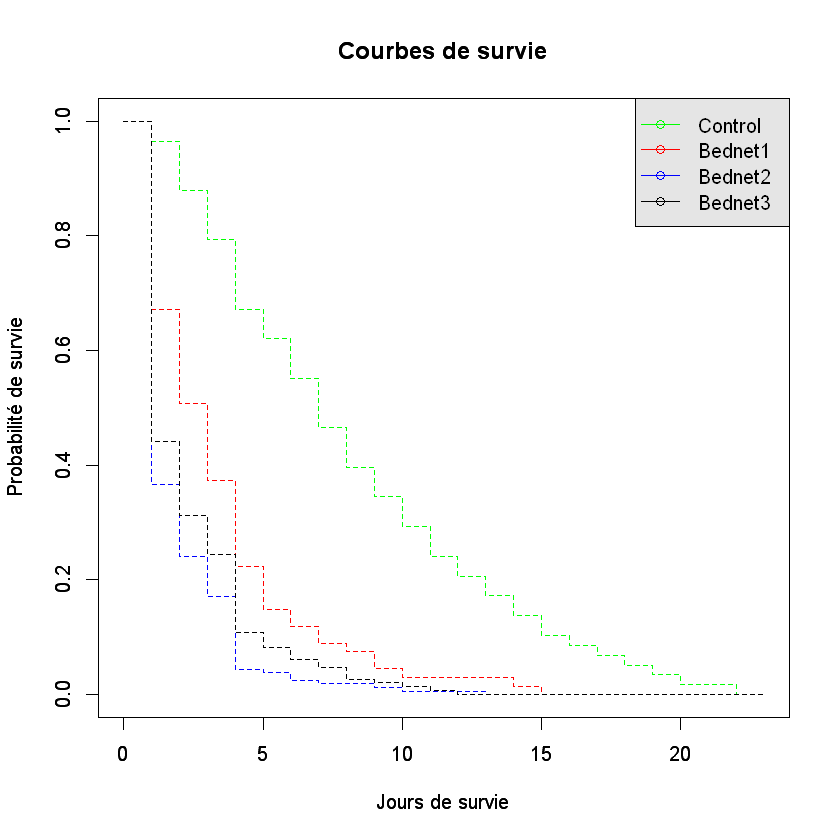

In [3]:
# Import the data 
data = read.csv('E:/DS Work Directory/KP_curve Data.csv', sep=';')
generate(data)